# **CS473 - Assignment 2**

In [18]:
import numpy as np

## **Part A**

#### Question 1

##### 1.
We will compute the posterior $P(D^+|T^+)$ using the given equation (1): <br>
$P(D^+|T^+) = \frac{P(T^+|D^+)*P(D^+)}{P(T^+)}$ <br> <br>
The terms of the equation will be as follows: <br>
* $P(T^+|D^+) = \frac{TP}{TP+FN} = TPR = sensitivity$ <br>
* $P(D^+) = prior$ <br>
* $P(T^+) = P(D^+)*P(T^+|D^+) + P(D^-)*P(T^+|D^-)$ where: <br>
    - $P(D^+)$ and $P(T^+|D^+)$ like above
    - $P(D^-) = 1 -  P(D^+) = 1-prior$ <br>
    - $P(T^+|D^-) = \frac{FP}{FP+TN} = 1-TNR = 1-specificity$ 
    <!-- * $P(T^+|D^-) = 1-P(T^-|D^-) = 1-specificity$  -->

In [19]:
def posterior(sensitivity, specificity, prior):
    post = sensitivity * prior
    post /= prior*sensitivity + (1-prior)*(1-specificity)
    return post

##### 2.
We will use the above function using our data as input: <br>
$prior = cases/population$ <br>
$sensitivity = 0.99$ <br>
$specificity = 0.96$

In [20]:
cases = 290000
population = 6.8 * 10**9
prior = cases/population
sensitivity = 0.99
specificity = 0.96

post = posterior(sensitivity, specificity, prior)
print(f"Probability of having the disease after 1 positive test: {post}")

Probability of having the disease after 1 positive test: 0.0010544466909435469


##### 3.
We use the posterior after the first test as a prior for the second time.

In [21]:
new_post = posterior(sensitivity, specificity, post)
print(f"Probability of having the disease after 2 positive tests: {new_post}")

Probability of having the disease after 2 positive tests: 0.025459959072947118


##### 4.
Same process as in (2.), but for the 3 different numbers of total cases.

In [22]:
n_cases = np.array([2*10**6, 7.5*10**6, 1*10**9], dtype=int)
priors = n_cases/population
posteriors = posterior(sensitivity, specificity, priors)

print(f"total number of cases: {n_cases}")
print(f"probability of having the disease after a positive test: {posteriors}")

total number of cases: [   2000000    7500000 1000000000]
probability of having the disease after a positive test: [0.00722892 0.02660099 0.8101473 ]


##### 5.
Since $prior = cases/population$, the prior increases as the number of cases increases. <br>
As the prior increases, we can see that the posterior probability also increases. <br>
This makes sense, since the prior is our initial "guess" of the probability we are trying to estimate, so we would expect it to influence the posterior, meaning that changes in the prior would result in similar changes (increase or decrease) in the posterior. <br>
We can also verify this by looking at the equation (1), where we see that the posterior should be proportional to the prior.

## **Part B**

### Question 1

##### 1.
This is simply $\frac{364}{365}$, since there are 364 out of the 365 days available (different).

In [23]:
p = 364/365
p

0.9972602739726028

##### 2.
This is the binomial coefficient $\binom{23}{2} = \frac{23!}{2!(23-2)!}$

In [24]:
from math import factorial
def C(n, k):
    return factorial(n) / (factorial(k) * factorial(n-k))

c = C(23,2)
round(c)

253

##### 3.
This probability will be equal to $p^c$, where $p$ is the probability of two childern having different birthdays, as computed in (1.), and $c$ is the number of combinations for a pair of two in the class of m children, this equals to $\binom{m}{2}$, like mentioned in (2.).

In [25]:
def alldiff(m):
    return p**C(m, 2)

print(f"for m=23: p={alldiff(23)}")

for m=23: p=0.4995228459634194


##### 4.
The probability of at least 2 children having the same birthday is equal to $1-P(alldiff)$, where $P(alldiff)$ is the probability of all children having different birthdays, as computed above. <br>
We start checking from $m=23$ and up to 365 (probably unnecessary).

In [26]:
M = np.arange(23, 366, dtype=int)

probs = np.array([alldiff(m) for m in M])
probs = 1 - probs

In [27]:
ans = np.argmax(probs>=0.999) + 23
# ans = np.searchsorted(probs, 0.999) + 23      # faster but less intuitive
print(f"Answer: {ans} childen")

Answer: 72 childen


So checking up to 365 children was totally unnecessary😭 <br>
However, this should have been expected, since we have number of comparisons equal to the combinations of children, which is much higher than the number of children and increases faster. <br>
For 72 children, this number is 2556, much higher than the number of days in a year, so we would expect to find at least one pair with the same birthday, however small the chance might be.

### Question 2

##### 1.
The guesses are assumed to be independent so the probabilities are as follows:

a) $1/2$

In [28]:
p = 1/2

b) $(1/2)^5$ or equivalently: $P(X=5)$ where $X\sim Binom(5, 1/2)$ the number of left guesses in 5

In [29]:
p**5

0.03125

c) $P(X=4)$ where $X\sim Binom(10, 1/2)$ the number of left guesses in 10

In [30]:
C(10,4) * p**4 * (1-p)**(10-4)

0.205078125

d)

In [31]:
likelihoodL = np.arange(0, 365, dtype=float) / 365
likelihoodR = 1 - likelihoodL

def likelihood(guess):
    if guess == 'L':
        return likelihoodL
    elif guess == 'R':
        return likelihoodR
    assert False

guesses = np.array(['L L L R L R R L R R R L L L R L L R R R L L L'.split()]).flatten()
priors = np.ones(365, dtype=float) / 365
posteriors = np.empty([len(guesses) + 1, len(priors)], dtype=float)

posteriors[0] = priors
for i, guess in enumerate(guesses):
    posteriors[i+1] = posteriors[i] * likelihood(guess)
    posteriors[i+1] /= np.sum(posteriors[i+1])

##### 2.

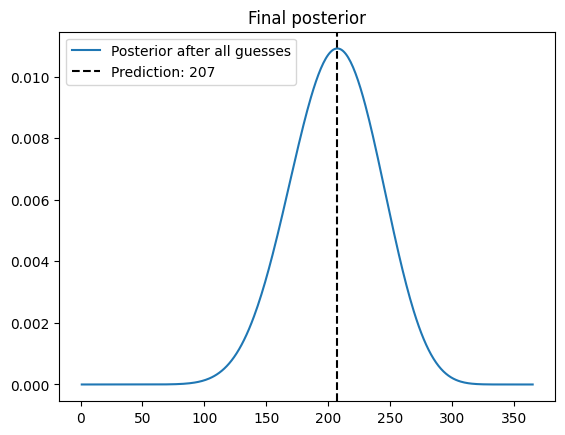

In [32]:
import matplotlib.pyplot as plt

x = np.arange(1, 366)

plt.plot(x, posteriors[-1])
day = np.argmax(posteriors[-1]) + 1
plt.axvline(day, color='k', linestyle='--')
plt.legend(["Posterior after all guesses", f"Prediction: {day}"], loc=2)
plt.title("Final posterior")
plt.show()

##### 3.


In [33]:
from datetime import datetime

date = datetime.strptime(str(day), '%j').strftime('%d/%m')

print(f"Most probable birthday: {date} (day #{day})")

Most probable birthday: 26/07 (day #207)


##### 4.

In [34]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

fig, ax = plt.subplots()
fig.suptitle("Posterior over time")
plt.close()

names = ["Prior"] + [f"Guess {i+1} ({guess})" for i, guess in enumerate(guesses)]

def animate(i):
    ax.clear()
    ax.set_ylim((0, 0.015))
    plot = ax.plot(x, posteriors[i])
    pred = np.argmax(posteriors[i]) + 1
    ax.axvline(pred, color='k', linestyle='--')
    ax.legend([names[i], f"Prediction: {pred}"], loc=2)
    return plot

anim = animation.FuncAnimation(fig, animate, frames=len(posteriors), interval=500)
anim